Caleb - Looking at salaries of baseball players over time



In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns

<Axes: xlabel='playerID', ylabel='dollars_per_hit'>

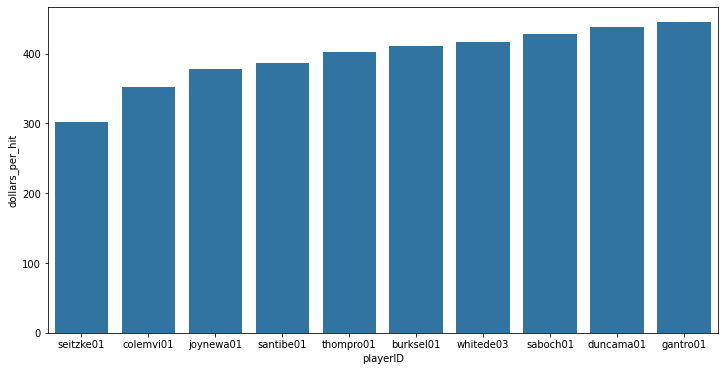

In [91]:
salary = pd.read_csv('Salaries.csv')
batting = pd.read_csv('Batting.csv')
# batting_salary = pd.merge(salary, batting, on='playerID', suffixes=('_salary', '_batting'))
batting_salary = pd.merge(salary, batting, on=['playerID', 'yearID', 'teamID', 'lgID'], suffixes=('_salary', '_batting'))


batting_salary['dollars_per_hit'] = batting_salary['salary'] / batting_salary['H']
batting_salary_filtered = batting_salary[(batting_salary['salary'] > 0) & (batting_salary['H'] > 0)]
batting_salary_sorted = batting_salary_filtered.sort_values(by='dollars_per_hit', ascending=True)
top_10_value_players = batting_salary_sorted.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='playerID', y='dollars_per_hit', data=top_10_value_players)


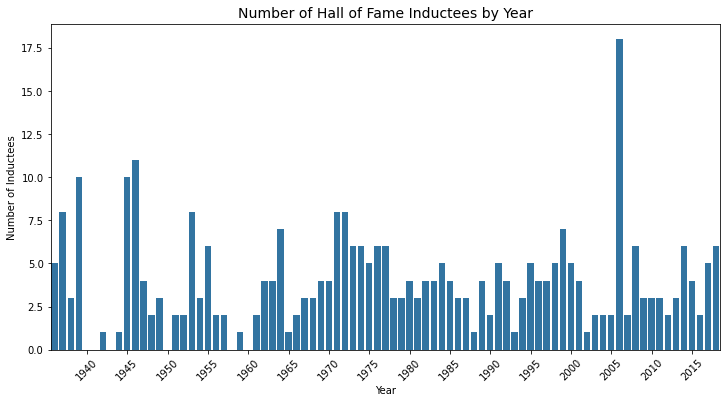

In [87]:
hof = pd.read_csv('HallOfFame.csv')
hof_inducted = hof[hof['inducted'] == 'Y']
hof_by_year = hof_inducted.groupby('yearid').size().reset_index(name='count')

min_year = hof_by_year['yearid'].min()
max_year = hof_by_year['yearid'].max()
all_years = pd.DataFrame({'yearid': range(min_year, max_year + 1)})
hof_by_year = pd.merge(all_years, hof_by_year, on='yearid', how='left').fillna(0)
hof_by_year['count'] = hof_by_year['count'].astype(int)
years_to_show = hof_by_year['yearid'][hof_by_year['yearid'] % 5 == 0]

plt.figure(figsize=(12, 6))
sns.barplot(x='yearid', y='count', data=hof_by_year)
plt.title('Number of Hall of Fame Inductees by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Inductees')
plt.xticks(ticks=hof_by_year[hof_by_year['yearid'].isin(years_to_show)].index, labels=years_to_show, rotation=45)
plt.show()

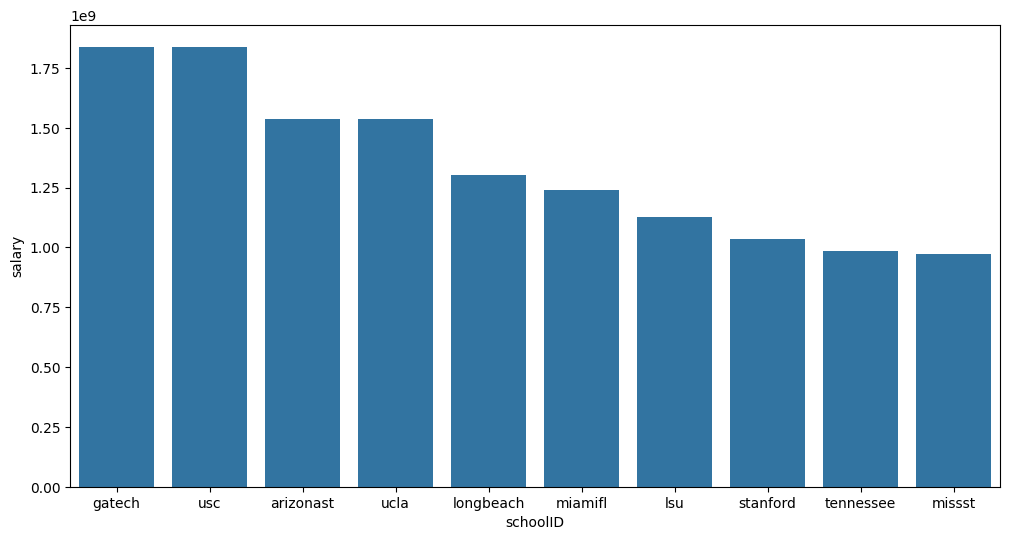

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

college_playing = pd.read_csv('CollegePlaying.csv')
players = pd.read_csv('People.csv')
salaries = pd.read_csv('Salaries.csv')
college_people = pd.merge(college_playing, players, on=['playerID'])
salaries_college_people = pd.merge(college_people, salaries, on=['playerID'])
salaries_college_people = salaries_college_people.drop_duplicates()
salariesCollFiltered = salaries_college_people[(salaries_college_people['salary'] > 0)]
salariesSorted = salariesCollFiltered.sort_values(by='salary', ascending=True)
school_salaries = salariesSorted.groupby('schoolID')['salary'].sum().reset_index()

# Sort by total salary in descending order to get the top salaries
top_schools = school_salaries.sort_values(by='salary', ascending=False).head(10)

plt.figure(figsize=(12, 6)) 
sns.barplot(x='schoolID', y='salary', data=top_schools)
plt.show()

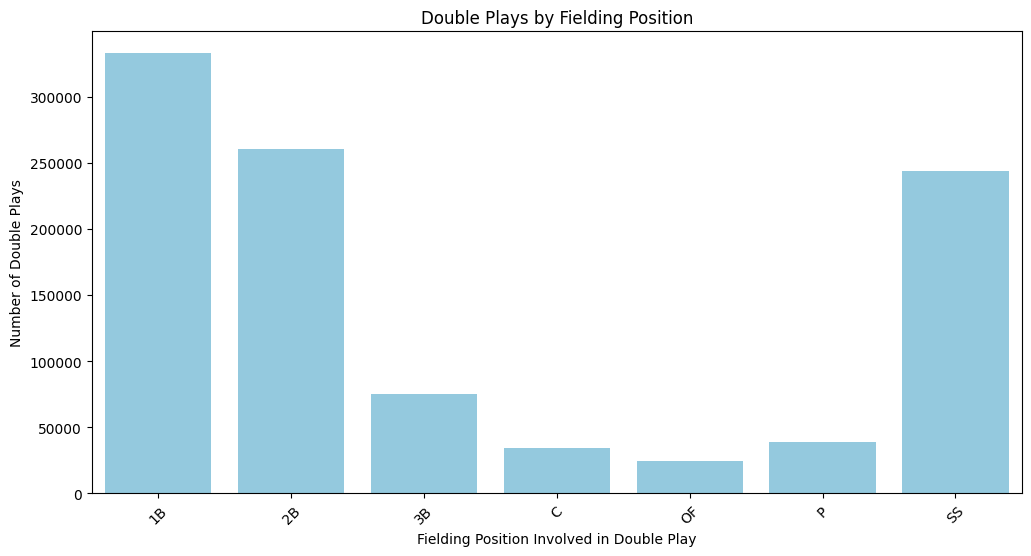

In [7]:
fielding_post = pd.read_csv('Fielding.csv')

position_dp = fielding_post.groupby('POS')['DP'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='POS', y='DP', data=position_dp, color='skyblue')

# Add titles and labels
plt.title('Double Plays by Fielding Position')
plt.xlabel('Fielding Position Involved in Double Play')
plt.ylabel('Number of Double Plays')

# Rotate x labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()